## Digit Identifiying Neural Network ##


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


Visualization of Data (examples)

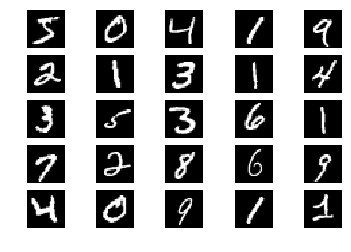

In [2]:
(X_TRAIN, Y_TRAIN), (X_TEST, Y_TEST) = mnist.load_data()

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_TRAIN[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

In [3]:
def sigmoid(x):
    """ sigmoid function for normalization """
    return 1 / (1 + np.exp(-x))

def prep(x, y):
    """ data preperation from integer array to 4D shaped_array """
    out_y = keras.utils.to_categorical(y, 10)

    shaped_array = x.reshape(-1, 28, 28, 1)
    preped_x = sigmoid(shaped_array)
    return preped_x, out_y

X_T_PREP, Y_T_PREP = prep(X_TRAIN, Y_TRAIN)

X_TEST_PREP, Y_TEST_PREP = prep(X_TEST, Y_TEST)

/home/kat/anaconda3/envs/deepl/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


### Building the Neural Network ###

In [5]:
M = Sequential()
M.add(Conv2D(100, kernel_size=(3, 3),
             activation='relu',
             data_format='channels_last',
             input_shape=(28, 28, 1)))
M.add(Conv2D(20, kernel_size=(3, 3),
             activation='relu',
             data_format='channels_last'))

M.add(Flatten())
M.add(Dense(50, activation='relu'))
M.add(Dense(10, activation='softmax'))
M.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
M.fit(X_T_PREP, Y_T_PREP, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 385s 6ms/step - loss: 0.2032 - acc: 0.9372
Epoch 2/10
60000/60000 [==============================] - 393s 7ms/step - loss: 0.0788 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 416s 7ms/step - loss: 0.0550 - acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 414s 7ms/step - loss: 0.0390 - acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 426s 7ms/step - loss: 0.0289 - acc: 0.9902
Epoch 6/10
60000/60000 [==============================] - 395s 7ms/step - loss: 0.0221 - acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 377s 6ms/step - loss: 0.0158 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 376s 6ms/step - loss: 0.0131 - acc: 0.9956
Epoch 9/10
60000/60000 [==============================] - 376s 6ms/step - loss: 0.0113 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 386s 6ms/step - loss: 0.0114 - a

In [6]:
M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 100)       1000      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 20)        18020     
_________________________________________________________________
flatten_2 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                576050    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 595,580
Trainable params: 595,580
Non-trainable params: 0
_________________________________________________________________


In [139]:
# model.evaluate(x=xte, y=yte)

10000/10000 [==============================] - 21s 2ms/step


[0.0872821976552932, 0.9814]

In [29]:
Y_PRED = M.predict_classes(X_TEST_PREP)

### Confusion Matrix ###

Visualizing Accuracy per digit

In [35]:
confusion_matrix(Y_TEST, Y_PRED)

array([[ 976,    1,    1,    0,    0,    1,    0,    1,    0,    0],
       [   2, 1125,    1,    2,    0,    0,    2,    1,    2,    0],
       [   1,    2, 1021,    0,    0,    0,    0,    5,    2,    1],
       [   0,    0,    3, 1000,    0,    3,    0,    0,    3,    1],
       [   2,    0,    4,    1,  955,    0,    1,    0,    2,   17],
       [   3,    0,    0,   14,    0,  870,    2,    0,    2,    1],
       [   9,    3,    1,    0,    5,   10,  928,    0,    2,    0],
       [   0,    1,    8,    2,    0,    0,    0, 1007,    3,    7],
       [   5,    0,    1,   19,    3,    4,    0,    3,  934,    5],
       [   2,    3,    0,    9,    4,    1,    0,    4,    1,  985]])

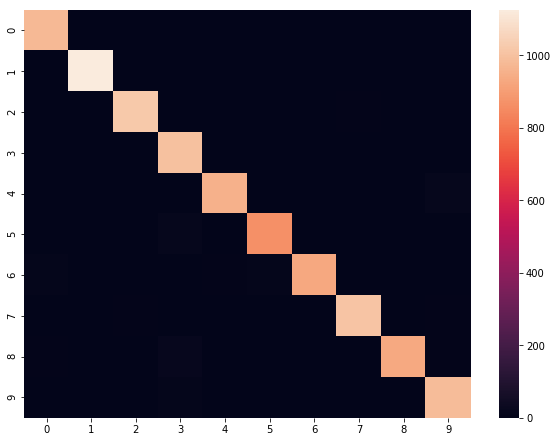

In [58]:
plt.figure(figsize=[10.0, 7.5])
sns.heatmap(confusion_matrix(Y_TEST, Y_PRED))
plt.show()